In [ ]:
import torchaudio
import torch.nn as nn
from torchaudio import transforms
from torchvision.transforms import Resize
from datasets import enterface
from constants import *

s, sr = torchaudio.load(
    "/root/intelpa-1/datasets/enterface database/subject 11/surprise/sentence 5/s12_su_5.avi", 
    normalize=True)

# w_len = int(enterface.SAMPLING_RATE / 1000 * enterface.SPEC_WINDOW_SZ_MS)
# h_len = int(enterface.SAMPLING_RATE / 1000 * enterface.SPEC_HOP_LEN_MS)
n_fft = 1024
hop_length = 512
n_mels = 128
melspec_t = nn.Sequential(
    transforms.MelSpectrogram(
        sample_rate=enterface.SAMPLING_RATE,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels,
    ),
    transforms.AmplitudeToDB(),
    Resize((HEIGHT, WIDTH))
)

melspec = melspec_t(s[1].unsqueeze(0))
mspec_fix = melspec.unsqueeze(0).repeat(1, 3, 1, 1)
mspec_fix.shape
# melspec.shape

In [ ]:
import matplotlib.pyplot as plt

a_perm = mspec_fix[0].permute(1,2,0)
a_perm1 = a_perm  + abs(a_perm.min())
a_norm = a_perm1/a_perm1.max()
plt.imshow(a_norm)


In [1]:
from data import load_data, Collate_Constrastive
from datasets import enterface
import warnings
from constants import *
warnings.filterwarnings('ignore')


collate_fn =Collate_Constrastive(enterface, force_audio_aspect=True)
train_dl, _, _, ss = load_data(enterface, collate_fn, batch_sz=BATCH_SZ)

for item in train_dl:
    rgb_batch_tensor1 = item["rgb_clip1"]
    rgb_batch_tensor2 = item["rgb_clip2"]
    spec_batch_tensor1= item["spec_clip1"]
    spec_batch_tensor2= item["spec_clip2"]
    label_batch_tensor= item["labels"]   
    print(rgb_batch_tensor1.shape, spec_batch_tensor1.shape)
    print(rgb_batch_tensor2.shape, spec_batch_tensor2.shape)
    break

torch.Size([4, 10, 3, 224, 224]) torch.Size([4, 3, 224, 224])
torch.Size([4, 10, 3, 224, 224]) torch.Size([4, 3, 224, 224])


tensor([[[0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[0.1924, 0.1924, 0.1924],
         [0.1924, 0.1924, 0.1924],
         [0.1924, 0.1924, 0.1924],
         ...,
         [0.2347, 0.2347, 0.2347],
         [0.2347, 0.2347, 0.2347],
         [0.2347, 0.2347, 0.2347]],

        [[0.5003, 0.5003, 0.5003],
         [0.5003, 0.5003, 0.5003],
         [0.5003, 0.5003, 0.5003],
         ...,
         [0.6102, 0.6102, 0.6102],
         [0.6102, 0.6102, 0.6102],
         [0.6102, 0.6102, 0.6102]],

        ...,

        [[0.5323, 0.5323, 0.5323],
         [0.5323, 0.5323, 0.5323],
         [0.5323, 0.5323, 0.5323],
         ...,
         [0.5227, 0.5227, 0.5227],
         [0.5227, 0.5227, 0.5227],
         [0.5227, 0.5227, 0.5227]],

        [[0.5275, 0.5275, 0.5275],
         [0.5275, 0.5275, 0.5275],
         [0.

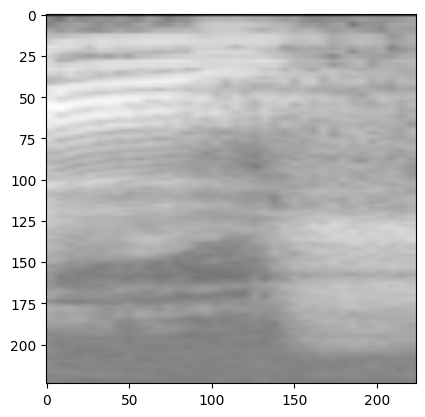

In [2]:
import matplotlib.pyplot as plt

a = spec_batch_tensor1[3]
a_perm = a.permute(1,2,0)
print(a_perm)
# plt.imshow(i_perm)
plt.imshow(a_perm)